In [1]:
from mira.metamodel.ops import stratify
from mira.metamodel.ops import simplify_rate_laws
from mira.modeling.viz import GraphicalModel
from mira.modeling.petri import PetriNetModel
from mira.modeling import Model
from mira.metamodel import model_to_json_file

### Start with simple SIR model

In [2]:
from mira.examples.sir import sir_parameterized

In [3]:
model_to_json_file(sir_parameterized, 'scenario1_sir_mira.json')

In [6]:
pm = PetriNetModel(Model(sir_parameterized))
pm.to_json_file('scenario1_sir.json', indent=1)

In [7]:
gm = GraphicalModel(Model(sir_parameterized))
gm.write('scenario1_sir.png')

### First stratification into 3 age groups

In [ ]:
tm = stratify(sir_parameterized,
         key='age',                            # Stratify by age
         strata=['young', 'middle', 'old'],    # These are the 3 strata needed
         structure=[],                         # No transition between age groups
         cartesian_control=True,               # All age groups can control
         modify_names=True,                    # Make sure we rename concepts
    )

In [ ]:
tm2 = simplify_rate_laws(tm)

In [ ]:
GraphicalModel.for_jupyter(tm2, width="50%")

In [ ]:
gm = GraphicalModel(Model(tm2))
gm.write('scenario1_three_ages.png')

In [ ]:
pm = PetriNetModel(Model(tm2))
pm.to_json_file('scenario1_three_ages.json', indent=1)

In [ ]:
model_to_json_file(tm2, 'scenario1_three_ages_mira.json')

### Second stratification into multiple age groups

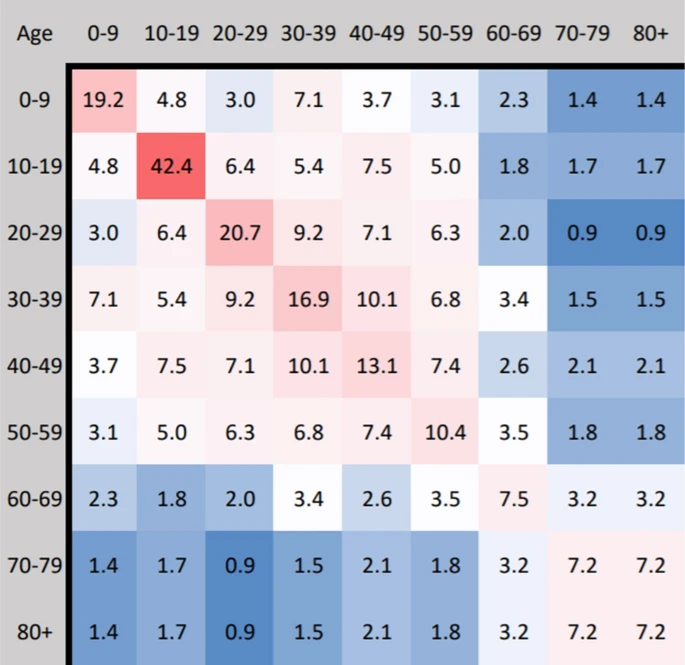

In [ ]:
age_groups = ['%d_%d' % (i*10, (i+1)*10-1) for i in range(8)] + ['80']

In [ ]:
age_groups

In [ ]:
tm = stratify(sir_parameterized,
         key='age',                            # Stratify by age
         strata=age_groups,                    # These are the strata needed
         structure=[],                         # No transition between age groups
         cartesian_control=True,               # All age groups can control
         modify_names=True,                    # Make sure we rename concepts
    )
tm3 = simplify_rate_laws(tm)

In [ ]:
GraphicalModel.for_jupyter(tm3, width="90%")

In [ ]:
tm3.parameters

In [ ]:
pm = PetriNetModel(Model(tm3))
pm.to_json_file('scenario1_all_ages.json', indent=1)

In [ ]:
model_to_json_file(tm3, 'scenario1_all_ages_mira.json')

In [ ]:
gm = GraphicalModel(Model(tm3))
gm.write('scenario1_all_ages.png')